In [13]:
import os
from datetime import datetime


from hydroai.gap_prediction import (
    predict_station_gaps,
    save_combined_plot_full,
    save_combined_plot_per_year,
)


In [2]:
station_file = "./data/lib/station_11.0_cleaned.csv"
model_type = "rf"

all_combined_dfs, val_full, metrics_gaps, real_predictions = predict_station_gaps(
    station_file, model_type=model_type
)

In [4]:


plot_start_date = None
plot_end_date = None
# Create a results directory with the current date and time
current_datetime = datetime.now().strftime("%Y%m%d_%H%M")
# input_folder = r'C:\temp22\HydroGAP-AI\run_gap_station_csv'
results_folder = os.path.join(
    os.path.dirname(station_file), f"results_{current_datetime}"
)
os.makedirs(results_folder, exist_ok=True)

# Extract the filename from the input file path
filename = os.path.basename(station_file)

# Process the single file

# Save combined plot for the full dataset
save_combined_plot_full(
    results_folder,
    val_full,
    real_predictions,
    filename,
    model_type,
    plot_start_date,
    plot_end_date,
)
# Save combined plot per year
save_combined_plot_per_year(results_folder, val_full, real_predictions, filename, model_type)
# Save the dataset with the real gaps filled with predictions
output_csv_filename = os.path.join(results_folder, f"pred_{filename}")
val_full = val_full.drop(columns=["year"])
val_full.to_csv(
    output_csv_filename, index=True
)  # Save the dataset with filled real gaps

# Append the new metrics to the existing CSV file
# with open(output_file1, mode='a', newline='') as file:
#    writer = csv.DictWriter(file, fieldnames=headers)
#    writer.writerow(metrics_gaps)

print(f"Processing completed for {filename}")

Processing completed for station_11.0_cleaned.csv


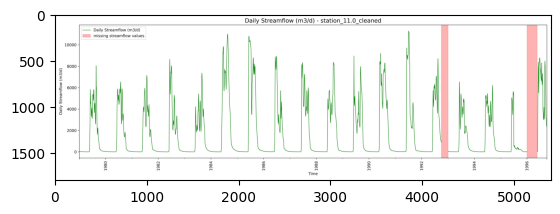

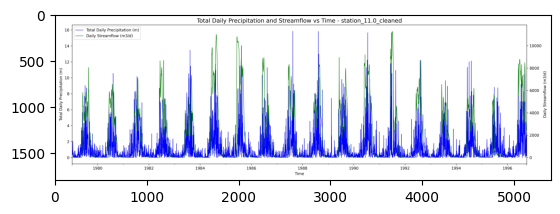

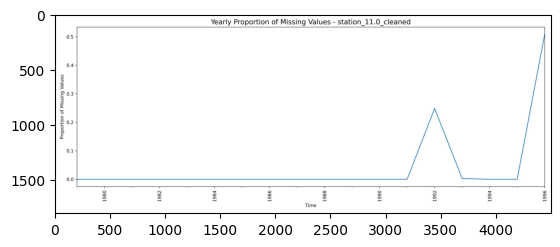

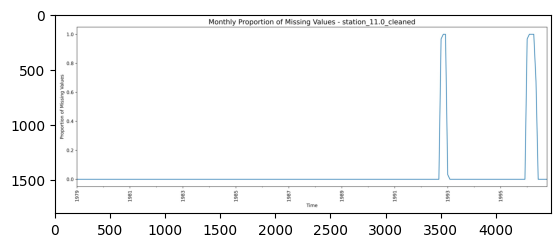

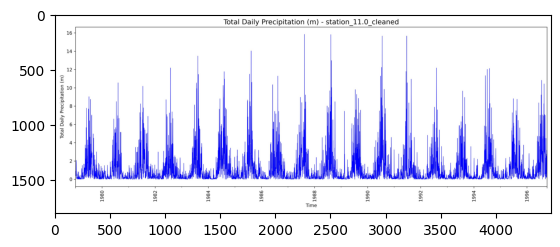

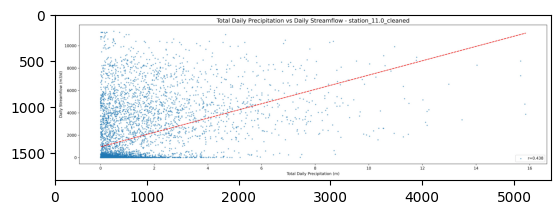

In [12]:
import glob
import matplotlib.pyplot as plt 
from PIL import Image
files = glob.glob('./data/lib/results_20240907_1441/*.jpg')

for file in files:
    img = Image.open(file)
    plt.imshow(img)
    plt.show()

In [5]:
results_folder

'./data/lib/results_20240907_1441'